In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
# Load Data
data = pd.read_excel(r'C:\Users\alexh\Desktop\7th Semester\Thesis\Bicycle_Trailers_Feature_Matrix.xlsx')

In [4]:
data.describe()

,Brand,Catalog Price [EUR],Application Type,Load Capacity [kg],Weight [kg],Application Type Count,Wheel Count,Wheel Diameter [cm],Material,Special Windows,...,Extra Wheel,Extra Handlebar,Parking Break,Detachable Seats,Seat Adjustment/Headrest/Premium Seat,Extra/Strengthened Floor Mat,Quick Release System,Suspension System,Mudcover,Compatibility
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.0,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000
mean,1.200000,563.243000,1.800000,39.150000,10.94250,1.500000,1.800000,52.324000,1.0,0.500000,...,0.500000,0.450000,0.400000,0.300000,1.150000,0.35000,1.950000,1.200000,0.200000,0.85000
std,0.410391,216.340339,0.894427,5.441314,3.19823,0.512989,0.410391,9.338012,0.0,0.512989,...,0.606977,0.510418,0.502625,0.470162,1.814416,0.48936,0.686333,1.321881,0.410391,0.74516
min,1.000000,260.660000,1.000000,34.000000,6.42000,1.000000,1.000000,40.640000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.00000
25%,1.000000,408.905000,1.000000,34.000000,8.24000,1.000000,2.000000,50.800000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.750000,0.000000,0.000000,0.00000
50%,1.000000,492.365000,1.500000,35.000000,10.44000,1.500000,2.000000,50.800000,1.0,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,1.000000,0.000000,1.00000
75%,1.000000,717.352500,3.000000,45.000000,12.50000,2.000000,2.000000,50.800000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.250000,1.00000,2.000000,3.000000,0.000000,1.00000
max,2.000000,956.350000,3.000000,45.000000,17.19000,2.000000,2.000000,71.120000,1.0,1.000000,...,2.000000,1.000000,1.000000,1.000000,4.000000,1.00000,3.000000,3.000000,1.000000,2.00000


In [5]:
data

,Brand,Catalog Price [EUR],Application Type,Load Capacity [kg],Weight [kg],Application Type Count,Wheel Count,Wheel Diameter [cm],Material,Special Windows,...,Extra Wheel,Extra Handlebar,Parking Break,Detachable Seats,Seat Adjustment/Headrest/Premium Seat,Extra/Strengthened Floor Mat,Quick Release System,Suspension System,Mudcover,Compatibility
0,1,369.36,1,45,9.88,2,2,50.80,1,1,...,0,0,0,0,0,0,2,1,0,0
1,1,391.10,1,34,9.79,1,2,50.80,1,1,...,0,0,0,0,0,0,2,1,0,0
2,1,325.88,1,34,9.79,1,2,50.80,1,1,...,0,0,0,0,0,0,2,1,0,0
3,1,414.84,3,45,7.57,1,2,40.64,1,0,...,0,0,0,0,0,0,2,0,0,0
4,1,499.80,1,45,8.00,2,2,50.80,1,1,...,1,0,0,0,0,0,2,1,0,0
5,1,499.80,2,34,11.00,1,2,40.64,1,0,...,0,0,0,0,0,0,2,0,0,0
6,1,456.32,2,34,14.00,1,2,40.64,1,0,...,0,1,0,0,0,0,2,0,0,1
7,1,434.58,3,45,8.00,1,2,40.64,1,0,...,0,0,0,0,0,0,1,0,0,0
8,1,695.47,1,45,11.60,2,2,50.80,1,1,...,1,1,1,1,3,0,2,3,0,1
9,1,869.39,1,34,12.50,1,2,50.80,1,1,...,1,1,1,1,4,1,2,3,0,1


In [6]:
scaler = StandardScaler()
data[['Brand_T','Catalog Price [EUR]_T','Application Type_T','Load Capacity [kg]_T', 'Weight [kg]_T','Application Type Count_T','Wheel Count_T','Wheel Diameter [cm]_T','Material_T','Special Windows_T','Extra Storage Section/Pockets_T','Water Resistant Exterior_T','Cover/Window_T','Lights/Reflector_T','Foldable Design_T','Technical and Utility Apparatus_T','Extra Wheel_T','Extra Handlebar_T','Parking Break_T','Detachable Seats_T','Seat Adjustment/Headrest/Premium Seat_T','Extra/Strengthened Floor Mat_T','Quick Release System_T','Suspension System_T','Mudcover_T','Compatibility_T']] = scaler.fit_transform(data[['Brand','Catalog Price [EUR]','Application Type','Load Capacity [kg]','Weight [kg]','Application Type Count','Wheel Count','Wheel Diameter [cm]','Material','Special Windows','Extra Storage Section/Pockets','Water Resistant Exterior','Cover/Window','Lights/Reflector','Foldable Design','Technical and Utility Apparatus','Extra Wheel','Extra Handlebar','Parking Break','Detachable Seats','Seat Adjustment/Headrest/Premium Seat','Extra/Strengthened Floor Mat','Quick Release System','Suspension System','Mudcover','Compatibility']])

In [7]:
print(data.head(50))

    Brand  Catalog Price [EUR]  Application Type  Load Capacity [kg]  \
0       1               369.36                 1                  45   
1       1               391.10                 1                  34   
2       1               325.88                 1                  34   
3       1               414.84                 3                  45   
4       1               499.80                 1                  45   
5       1               499.80                 2                  34   
6       1               456.32                 2                  34   
7       1               434.58                 3                  45   
8       1               695.47                 1                  45   
9       1               869.39                 1                  34   
10      1               673.72                 2                  34   
11      1               695.66                 1                  34   
12      1               917.87                 1                

In [8]:
#Create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

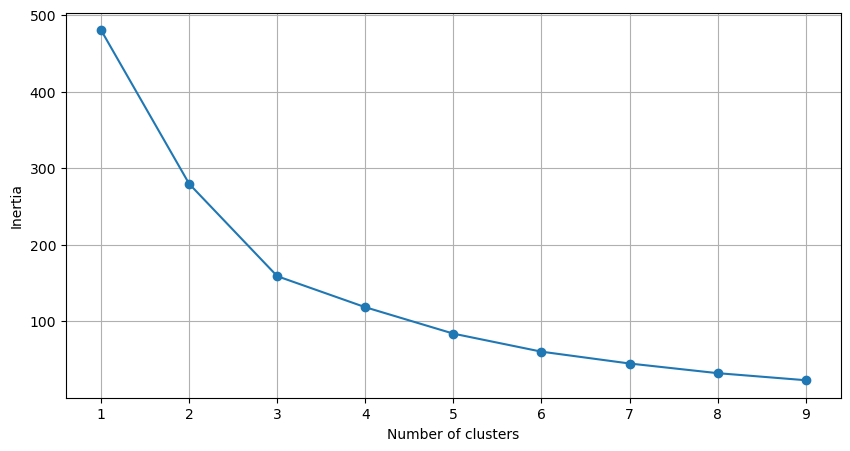

In [9]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

optimise_k_means(data[['Brand_T','Catalog Price [EUR]_T','Application Type_T','Load Capacity [kg]_T','Weight [kg]_T','Application Type Count_T','Wheel Count_T','Wheel Diameter [cm]_T','Material_T','Special Windows_T','Extra Storage Section/Pockets_T','Water Resistant Exterior_T','Cover/Window_T','Lights/Reflector_T','Foldable Design_T','Technical and Utility Apparatus_T','Extra Wheel_T','Extra Handlebar_T','Parking Break_T','Detachable Seats_T','Seat Adjustment/Headrest/Premium Seat_T','Extra/Strengthened Floor Mat_T','Quick Release System_T','Suspension System_T','Mudcover_T','Compatibility_T']],10)

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['Brand_T','Catalog Price [EUR]_T','Application Type_T','Load Capacity [kg]_T','Weight [kg]_T','Application Type Count_T','Wheel Count_T','Wheel Diameter [cm]_T','Material_T','Special Windows_T','Extra Storage Section/Pockets_T','Water Resistant Exterior_T','Cover/Window_T','Lights/Reflector_T','Foldable Design_T','Technical and Utility Apparatus_T','Extra Wheel_T','Extra Handlebar_T','Parking Break_T','Detachable Seats_T','Seat Adjustment/Headrest/Premium Seat_T','Extra/Strengthened Floor Mat_T','Quick Release System_T','Suspension System_T','Mudcover_T','Compatibility_T']])

KMeans(n_clusters=3)

In [11]:
data['kmeans_3'] = kmeans.labels_

In [12]:
data

,Brand,Catalog Price [EUR],Application Type,Load Capacity [kg],Weight [kg],Application Type Count,Wheel Count,Wheel Diameter [cm],Material,Special Windows,...,Extra Handlebar_T,Parking Break_T,Detachable Seats_T,Seat Adjustment/Headrest/Premium Seat_T,Extra/Strengthened Floor Mat_T,Quick Release System_T,Suspension System_T,Mudcover_T,Compatibility_T,kmeans_3
0,1,369.36,1,45,9.88,2,2,50.80,1,1,...,-0.904534,-0.816497,-0.654654,-0.650278,-0.733799,0.074744,-0.155230,-0.5,-1.170328,0
1,1,391.10,1,34,9.79,1,2,50.80,1,1,...,-0.904534,-0.816497,-0.654654,-0.650278,-0.733799,0.074744,-0.155230,-0.5,-1.170328,0
2,1,325.88,1,34,9.79,1,2,50.80,1,1,...,-0.904534,-0.816497,-0.654654,-0.650278,-0.733799,0.074744,-0.155230,-0.5,-1.170328,0
3,1,414.84,3,45,7.57,1,2,40.64,1,0,...,-0.904534,-0.816497,-0.654654,-0.650278,-0.733799,0.074744,-0.931381,-0.5,-1.170328,0
4,1,499.80,1,45,8.00,2,2,50.80,1,1,...,-0.904534,-0.816497,-0.654654,-0.650278,-0.733799,0.074744,-0.155230,-0.5,-1.170328,0
5,1,499.80,2,34,11.00,1,2,40.64,1,0,...,-0.904534,-0.816497,-0.654654,-0.650278,-0.733799,0.074744,-0.931381,-0.5,-1.170328,0
6,1,456.32,2,34,14.00,1,2,40.64,1,0,...,1.105542,-0.816497,-0.654654,-0.650278,-0.733799,0.074744,-0.931381,-0.5,0.206529,0
7,1,434.58,3,45,8.00,1,2,40.64,1,0,...,-0.904534,-0.816497,-0.654654,-0.650278,-0.733799,-1.420127,-0.931381,-0.5,-1.170328,0
8,1,695.47,1,45,11.60,2,2,50.80,1,1,...,1.105542,1.224745,1.527525,1.046100,-0.733799,0.074744,1.397071,-0.5,0.206529,2
9,1,869.39,1,34,12.50,1,2,50.80,1,1,...,1.105542,1.224745,1.527525,1.611559,1.362770,0.074744,1.397071,-0.5,0.206529,2


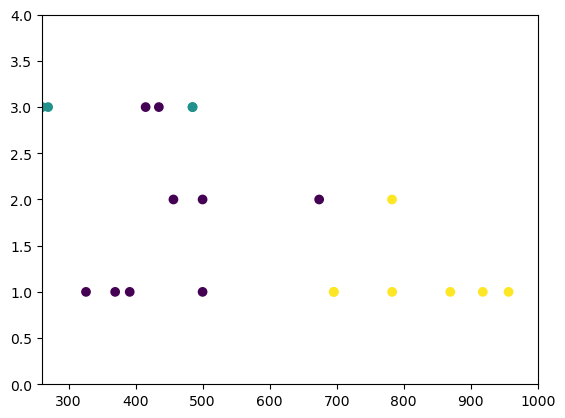

In [13]:
plt.scatter(x=data['Application Type'], y=data['Application Type'], c=data['kmeans_3'])
plt.xlim(260, 1000)
plt.ylim(0, 4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define your feature combinations for clustering
feature_combinations = [
    ('Catalog Price [EUR]_T', 'Application Type_T'),
    ('Extra Wheel_T', 'Extra Handlebar_T'),
    ('Technical and Utility Apparatus_T', 'Mudcover_T'),
    # Add more combinations as needed
]

# Number of clusters for each combination
n_clusters = 3

# Initialize the figure for subplots
fig, axes = plt.subplots(nrows=len(feature_combinations), ncols=1, figsize=(10, 5 * len(feature_combinations)))

# If there is only one combination, axes will not be an array, so we wrap it in a list
if len(feature_combinations) == 1:
    axes = [axes]

# Loop through each combination and create subplots
for i, (feature_x, feature_y) in enumerate(feature_combinations):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data[[feature_x, feature_y]])
    
    # Add cluster labels to the data
    data[f'kmeans_{feature_x}_{feature_y}'] = kmeans.labels_
    
    # Create a scatter plot
    axes[i].scatter(x=data[feature_x], y=data[feature_y], c=data[f'kmeans_{feature_x}_{feature_y}'])
    axes[i].set_xlim(-1, 1)  # Assuming the data is scaled
    axes[i].set_ylim(-1, 1)  # Adjust limits as necessary
    axes[i].set_title(f'Clusters for {feature_x} vs {feature_y}')
    axes[i].set_xlabel(feature_x)
    axes[i].set_ylabel(feature_y)

# Adjust layout
plt.tight_layout()
plt.show()

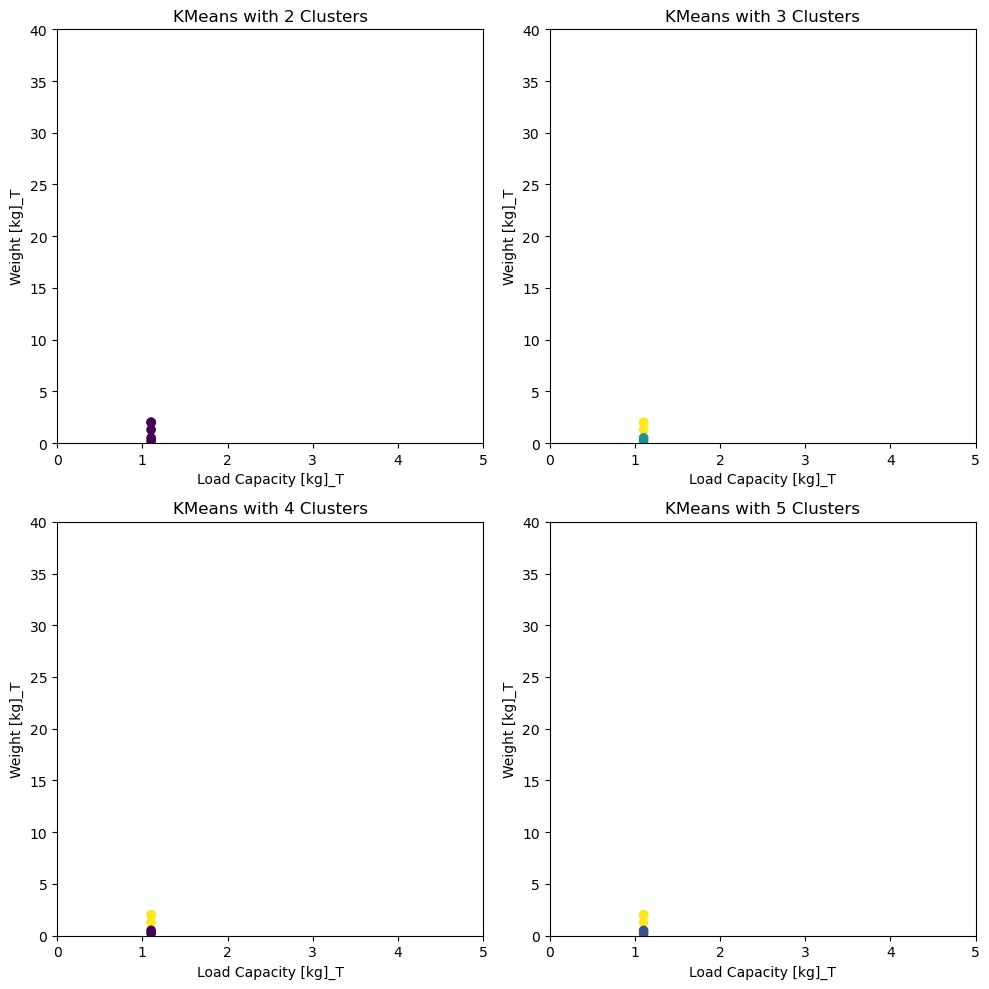

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame and it's already preprocessed.

# Initialize the figure
plt.figure(figsize=(10, 10))

# Cluster and plot for different numbers of clusters
for i, n_clusters in enumerate([2, 3, 4, 5]):  # You can change the list to the number of clusters you want to try
    # Create subplot for each number of clusters
    plt.subplot(2, 2, i+1)  # Change '2, 2' if you have a different grid size
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data[['Load Capacity [kg]_T','Weight [kg]_T']])  # Assuming these are the columns you want to cluster on
    
    # Assign the labels to your DataFrame
    data[f'kmeans_{n_clusters}'] = kmeans.labels_
    
    # Scatter plot
    plt.scatter(x=data['Load Capacity [kg]_T'], y=data['Weight [kg]_T'], c=data[f'kmeans_{n_clusters}'])
    
    # Set the limits if necessary
    plt.xlim(0, 5)
    plt.ylim(0, 40)
    
    # Set titles and labels if desired
    plt.title(f'KMeans with {n_clusters} Clusters')
    plt.xlabel('Load Capacity [kg]_T')
    plt.ylabel('Weight [kg]_T')

# Show the plot with all subplots
plt.tight_layout()
plt.show()

Clustering on feature: Brand_T


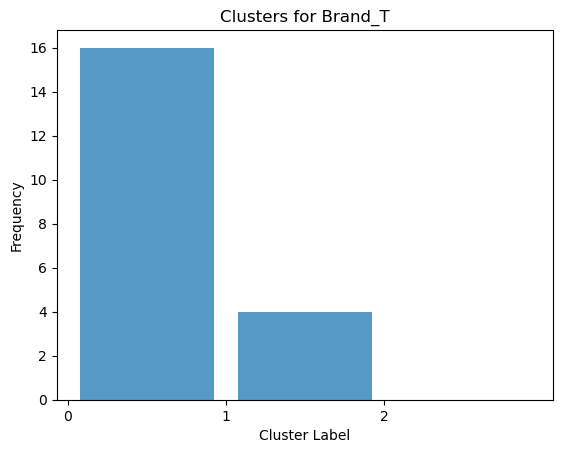

Clustering on feature: Catalog Price [EUR]_T


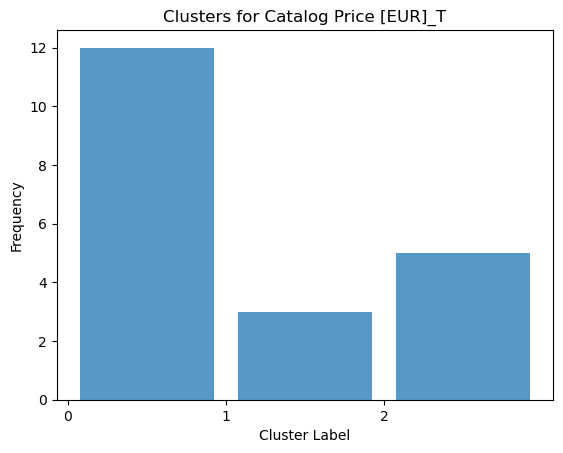

Clustering on feature: Application Type_T


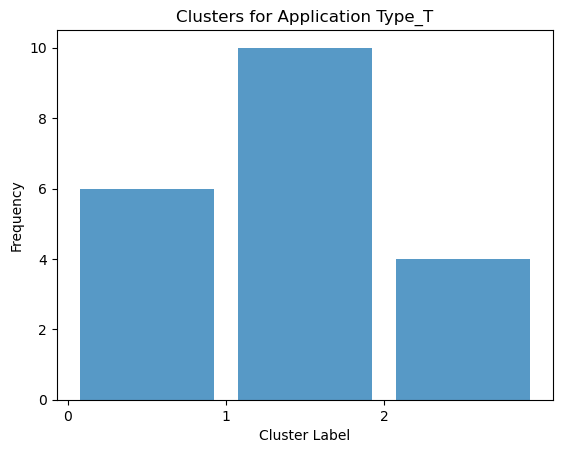

Clustering on feature: Load Capacity [kg]_T


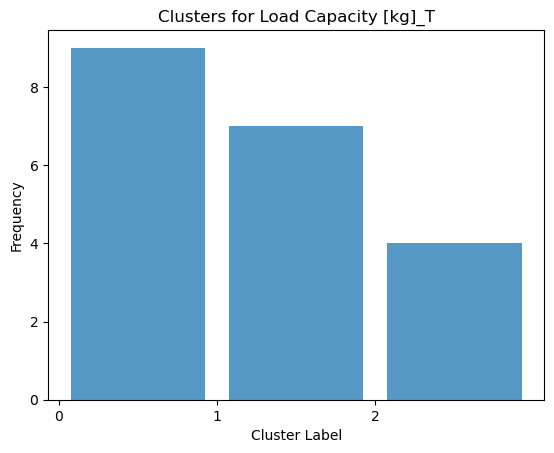

Clustering on feature: Weight [kg]_T


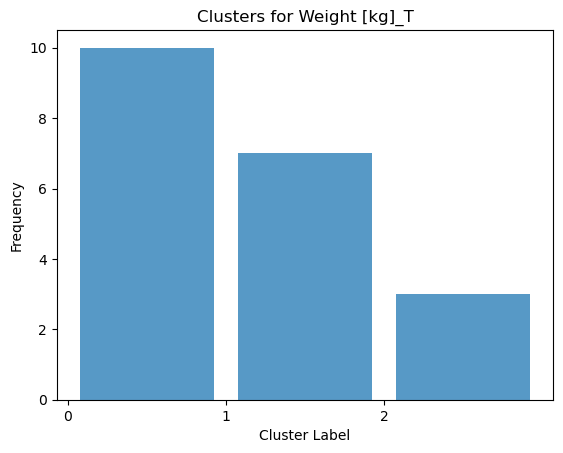

Clustering on feature: Application Type Count_T


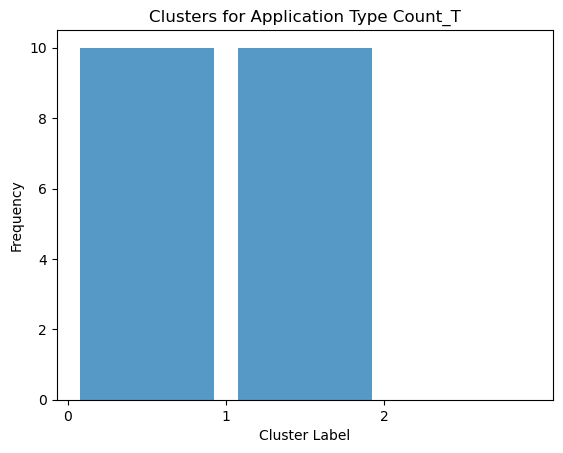

Clustering on feature: Wheel Count_T


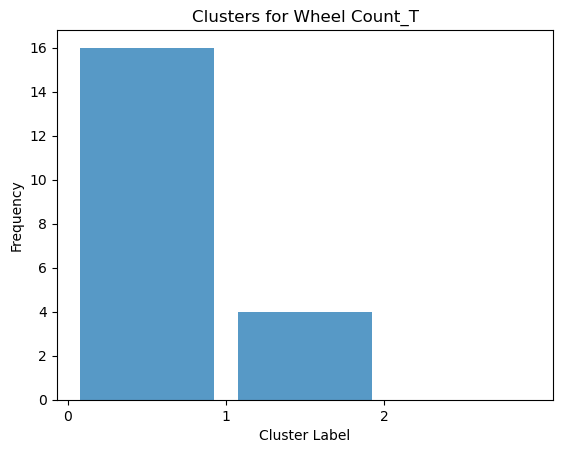

Clustering on feature: Wheel Diameter [cm]_T


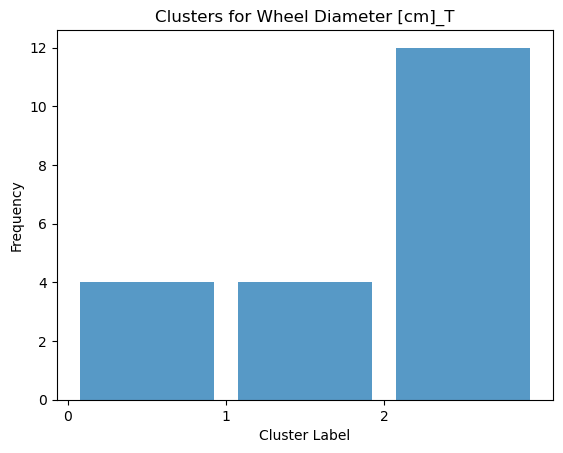

Clustering on feature: Material_T


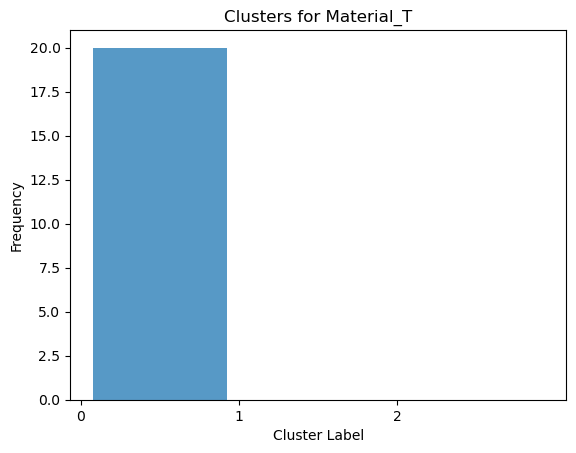

Clustering on feature: Special Windows_T


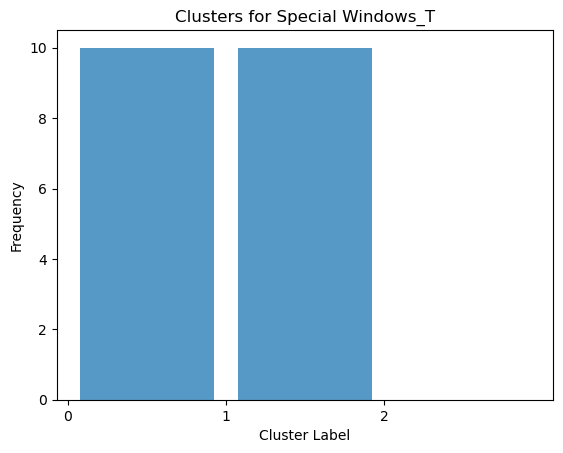

Clustering on feature: Extra Storage Section/Pockets_T


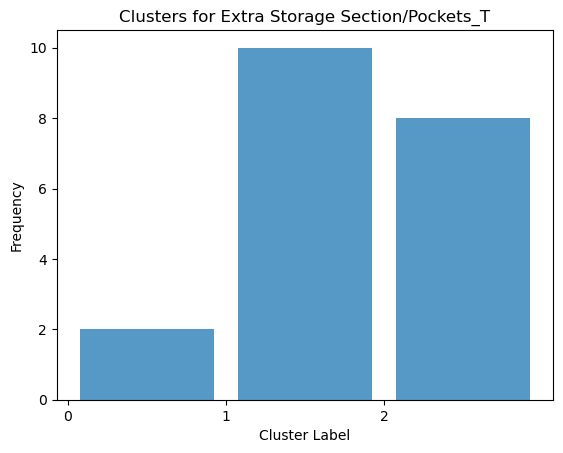

Clustering on feature: Water Resistant Exterior_T


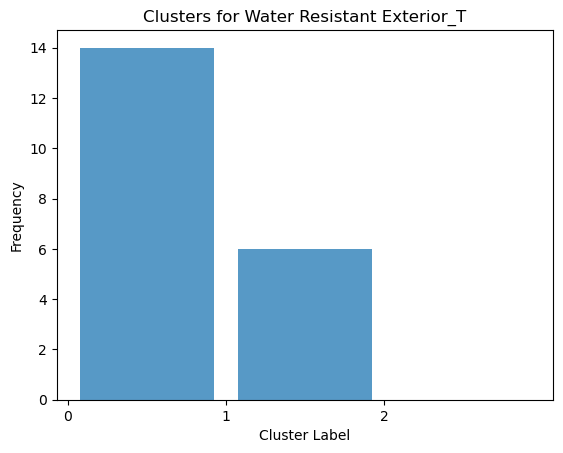

Clustering on feature: Cover/Window_T


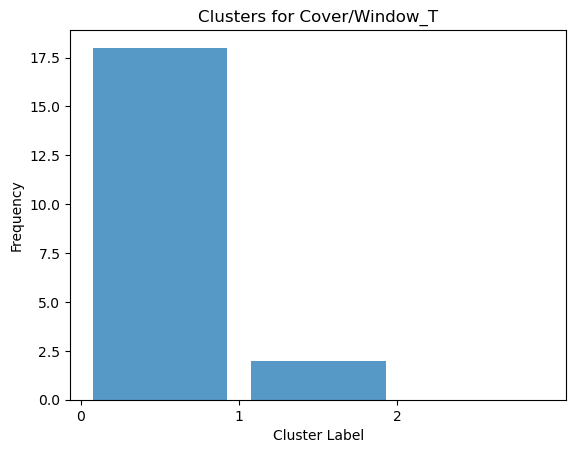

Clustering on feature: Lights/Reflector_T


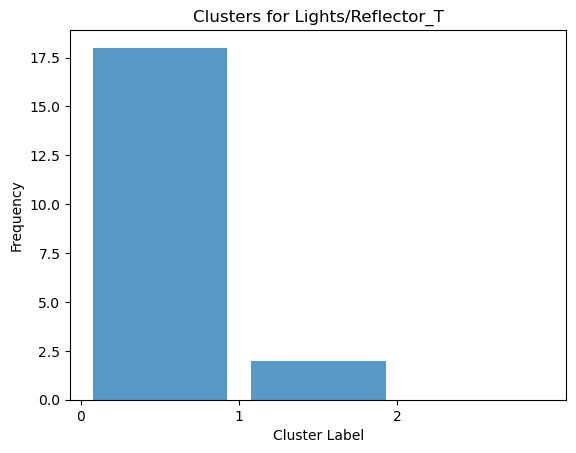

Clustering on feature: Foldable Design_T


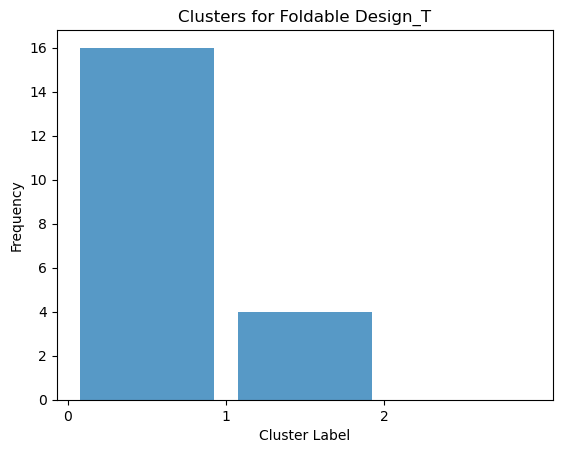

Clustering on feature: Technical and Utility Apparatus_T


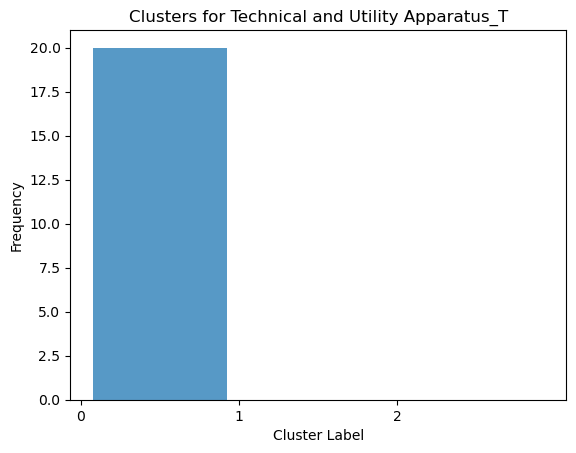

Clustering on feature: Extra Wheel_T


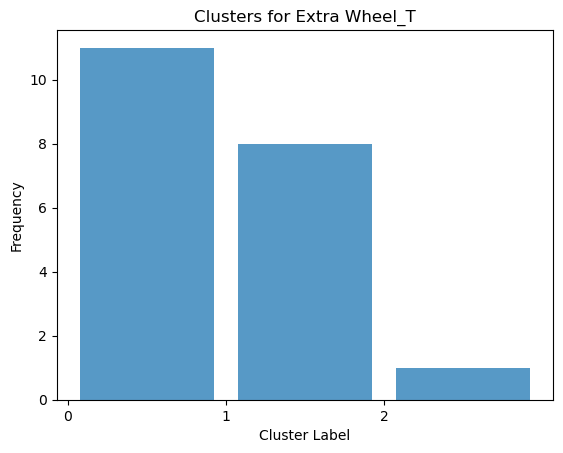

Clustering on feature: Extra Handlebar_T


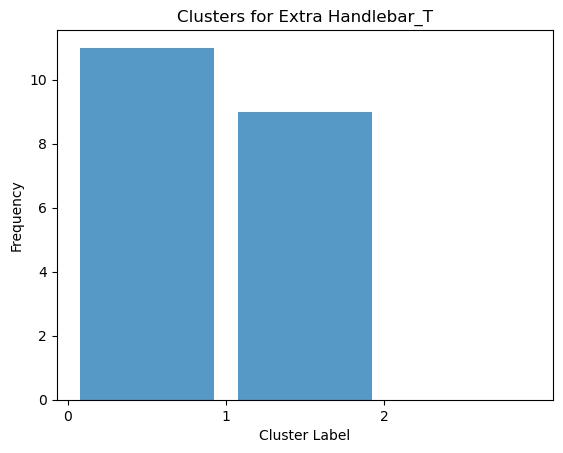

Clustering on feature: Parking Break_T


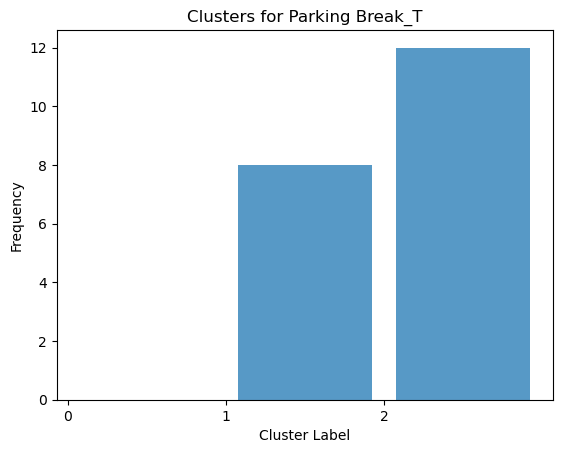

Clustering on feature: Detachable Seats_T


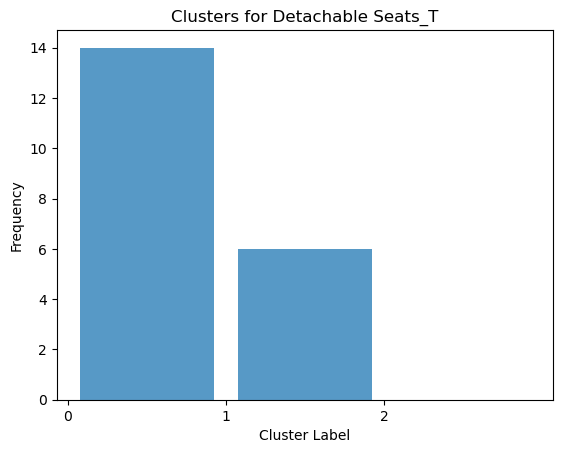

Clustering on feature: Seat Adjustment/Headrest/Premium Seat_T


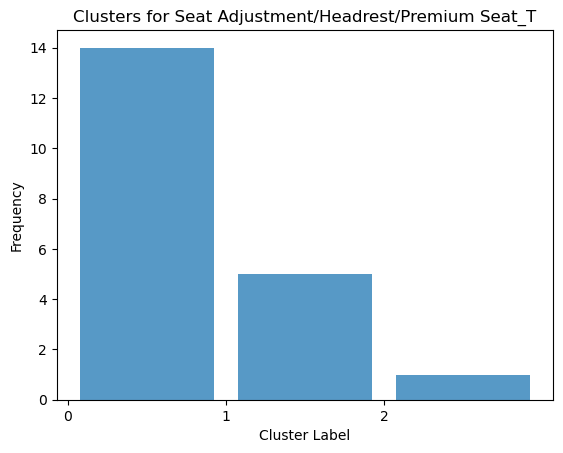

Clustering on feature: Extra/Strengthened Floor Mat_T


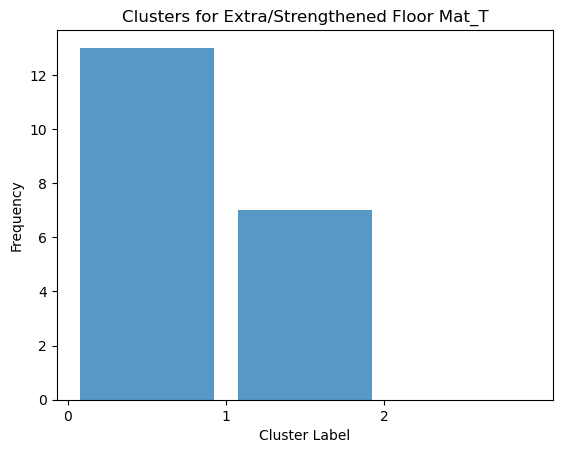

Clustering on feature: Quick Release System_T


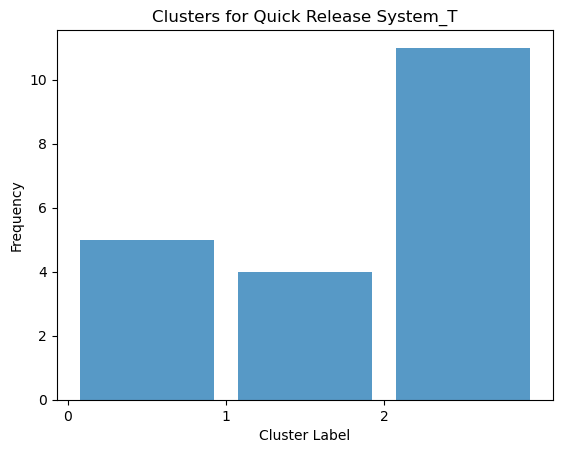

Clustering on feature: Suspension System_T


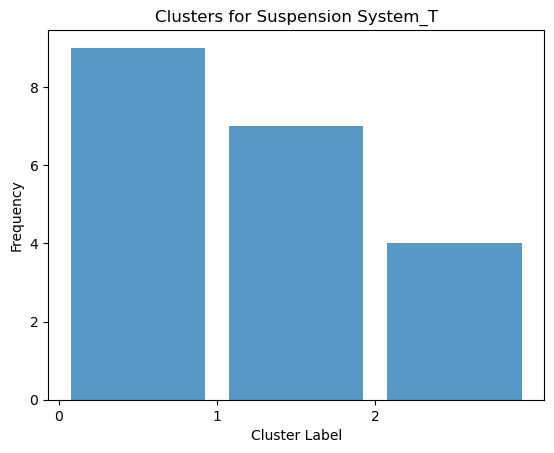

Clustering on feature: Mudcover_T


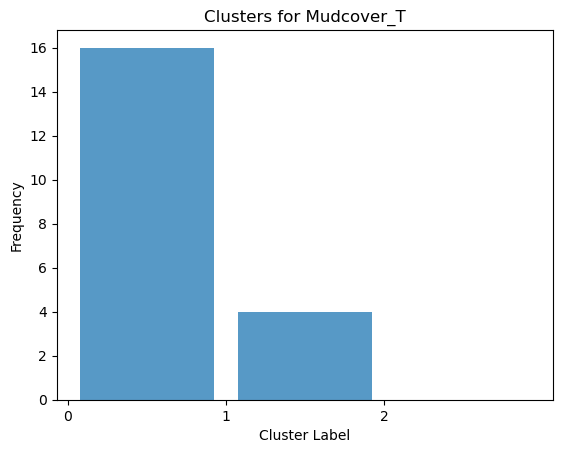

Clustering on feature: Compatibility_T


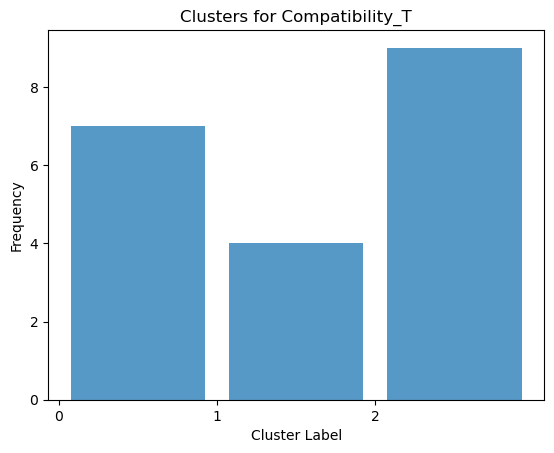

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def cluster_and_visualize(data, feature_name, n_clusters=3):
    # Clustering on one feature
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    feature_values = data[[feature_name]].dropna()  # Ensure no NaN values
    kmeans.fit(feature_values)

    # Create a new column for cluster labels
    cluster_labels = kmeans.labels_
    
    # Plotting the histogram of clusters
    plt.hist(cluster_labels, bins=range(n_clusters+1), alpha=0.75, rwidth=0.85)
    plt.title(f'Clusters for {feature_name}')
    plt.xlabel('Cluster Label')
    plt.ylabel('Frequency')
    plt.xticks(range(n_clusters))
    plt.show()
    
    return kmeans  # Return the model if needed for further analysis

# List of features to cluster on
features_to_cluster = [
    'Brand_T', 'Catalog Price [EUR]_T', 'Application Type_T', 'Load Capacity [kg]_T', 
    'Weight [kg]_T', 'Application Type Count_T', 'Wheel Count_T', 'Wheel Diameter [cm]_T', 
    'Material_T', 'Special Windows_T', 'Extra Storage Section/Pockets_T', 
    'Water Resistant Exterior_T', 'Cover/Window_T', 'Lights/Reflector_T', 
    'Foldable Design_T', 'Technical and Utility Apparatus_T', 'Extra Wheel_T', 
    'Extra Handlebar_T', 'Parking Break_T', 'Detachable Seats_T', 
    'Seat Adjustment/Headrest/Premium Seat_T', 'Extra/Strengthened Floor Mat_T', 
    'Quick Release System_T', 'Suspension System_T', 'Mudcover_T', 'Compatibility_T'
]

# Apply clustering for each feature
for feature in features_to_cluster:
    print(f"Clustering on feature: {feature}")
    cluster_and_visualize(data, feature)

In [19]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data[['Weight [kg]_T','Load Capacity [kg]_T']])
    data[f'KMeans_{k}'] = kmeans.labels_

In [21]:
data

,Brand,Catalog Price [EUR],Application Type,Load Capacity [kg],Weight [kg],Application Type Count,Wheel Count,Wheel Diameter [cm],Material,Special Windows,...,Compatibility_T,kmeans_3,kmeans_2,kmeans_4,kmeans_5,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,1,369.36,1,45,9.88,2,2,50.80,1,1,...,-1.170328,1,0,0,2,0,1,1,2,0
1,1,391.10,1,34,9.79,1,2,50.80,1,1,...,-1.170328,0,1,1,0,0,0,0,1,1
2,1,325.88,1,34,9.79,1,2,50.80,1,1,...,-1.170328,0,1,1,0,0,0,0,1,1
3,1,414.84,3,45,7.57,1,2,40.64,1,0,...,-1.170328,1,0,0,2,0,1,1,2,0
4,1,499.80,1,45,8.00,2,2,50.80,1,1,...,-1.170328,1,0,0,2,0,1,1,2,0
5,1,499.80,2,34,11.00,1,2,40.64,1,0,...,-1.170328,0,1,2,3,0,0,0,3,3
6,1,456.32,2,34,14.00,1,2,40.64,1,0,...,0.206529,0,1,2,3,0,0,0,3,3
7,1,434.58,3,45,8.00,1,2,40.64,1,0,...,-1.170328,1,0,0,2,0,1,1,2,0
8,1,695.47,1,45,11.60,2,2,50.80,1,1,...,0.206529,1,0,0,1,0,1,1,2,4
9,1,869.39,1,34,12.50,1,2,50.80,1,1,...,0.206529,0,1,2,3,0,0,0,3,3


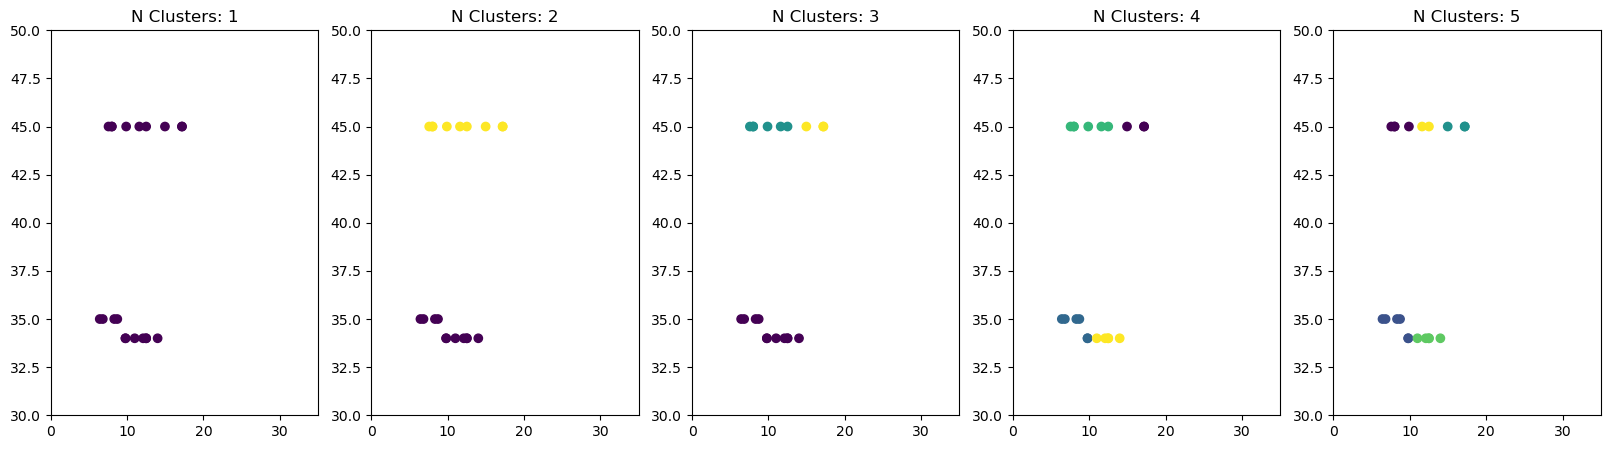

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=data['Weight [kg]'], y=data['Load Capacity [kg]'], c=data[f'KMeans_{i}'])
    ax.set_ylim(30, 50)
    ax.set_xlim(0, 35)
    ax.set_title(f'N Clusters: {i}')

In [33]:
customer_input = "I am a customer and I have a dog. I want a bicycle trailer to carry him with me. He is 20 kg. I want a foldable design."

# Extract the weight of the dog
import re
weight_match = re.search(r'(\d+) kg', customer_input)
if weight_match:
    dog_weight = int(weight_match.group(1))
else:
    dog_weight = None

print(f"Extracted dog weight: {dog_weight} kg")

Extracted dog weight: 20 kg


In [40]:
# Assuming 'data' is your DataFrame containing the trailer information
suitable_trailers = data[data['Load Capacity [kg]'] >= dog_weight]

In [41]:
# Find the most common cluster for trailers with at least 20 kg capacity
common_cluster = suitable_trailers['kmeans_3'].mode()[0]

In [42]:
# Extract the common features of trailers in the common cluster
recommended_features = data[data['kmeans_3'] == common_cluster].mean()

# Create a simple recommendation string based on some of these features
recommendation = f"Dear customer, based on your requirement, I suggest a trailer with: "\
                 f"a load capacity of at least {dog_weight} kg, "\
                 f"{'foldable' if recommended_features['Foldable Design_T'] > 0.5 else 'non-foldable'} design, "\
                 f"wheels of diameter {recommended_features['Wheel Diameter [cm]_T']*15 + 15:.0f} cm."  # Assuming the original wheel diameter has been scaled down by 15

print(recommendation)

Dear customer, based on your requirement, I suggest a trailer with: a load capacity of at least 20 kg, non-foldable design, wheels of diameter 20 cm.


In [90]:
customer_input = """
I am a customer and I have a dog. I want a bicycle trailer to carry him with me. 
He is 20 kg. I want a foldable design and with a two arm.
"""

# Extract the weight of the dog
weight_match = re.search(r'(\d+) kg', customer_input)
dog_weight = int(weight_match.group(1)) if weight_match else None

# Feature extraction patterns
feature_patterns = {
    'foldable_design': r'foldable design',
    'water_resistant': r'waterproof',
    'parking_break': r'parking break',
    'Lights/Reflector': r'lights|reflector',
    'Technical_and_Utility_Apparatus': r'hitch|tow arm|safety flag'
    # Add more patterns for other features here
}

# Dictionary to hold the extracted features
extracted_features = {}

# Process each pattern and extract information
for feature, pattern in feature_patterns.items():
    match = re.search(pattern, customer_input, re.IGNORECASE)
    extracted_features[feature] = bool(match)

# Filter the trailers based on the extracted features
conditions = (data['Load Capacity [kg]'] >= dog_weight) if dog_weight else True

# Add more conditions based on the extracted features
if extracted_features.get('foldable_design'):
    conditions &= (data['Foldable Design_T'] > 0.5)

if extracted_features.get('water_resistant'):
    conditions &= (data['Water Resistant Exterior_T'] > 0.5)

if extracted_features.get('parking_break'):
    conditions &= (data['Parking Break_T'] > 0.5)

if extracted_features.get('Lights/Reflector'):
    conditions &= (data['Lights/Reflector_T'] > 0.1)

if extracted_features.get('Technical_and_Utility_Apparatus'):
    conditions &= (data['Technical and Utility Apparatus_T'] > 0.1)
    
# Find suitable trailers based on the conditions
suitable_trailers = data[conditions]

# If no suitable trailers found, handle the case appropriately
if suitable_trailers.empty:
    recommendation = "We are sorry, but we do not have a trailer that matches all your requirements."
else:
    # Find the most common cluster among the suitable trailers
    common_cluster = suitable_trailers['kmeans_3'].mode()[0]
    
    # Extract the common features of trailers in the common cluster
    recommended_features = data[data['kmeans_3'] == common_cluster].mean()
    
    # Create a detailed recommendation string
    recommendation = (
    f"""Dear customer, based on your requirements, I suggest a trailer with the following features: "
    f"{'- Foldable design' if extracted_features.get('foldable_design') else ''}"
    f"{'- Waterproof exterior' if extracted_features.get('water_resistant') else ''}"
    f"{'- Parking break' if extracted_features.get('parking_break') else ''}"
    f"- Load capacity of at least {dog_weight} kg"
    f"- Wheels with a diameter of approximately {recommended_features['Wheel Diameter [cm]_T']*15 + 15:.0f} cm.""")
print(recommendation)


We are sorry, but we do not have a trailer that matches all your requirements.
